In [1]:
import re


class Extractor(object):
    def __init__(self, path):
        with open(path, "r") as f:
            lines = f.readlines()
        self.lines = {}
        for mode in ["train", "test"]:
            key = "({}) Epoch".format(mode)
            self.lines[mode] = [line for line in lines if key in line]

    def __call__(self, mode, key):
        key = "\'{}\'".format(key)
        lines = self.lines[mode]
        lines = [re.split('[{}]', line)[1].split(', ') for line in lines]
        lines = [[item for item in line if key in item] for line in lines]
        lines = [float(line[0].split()[1]) for line in lines]
        return lines

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

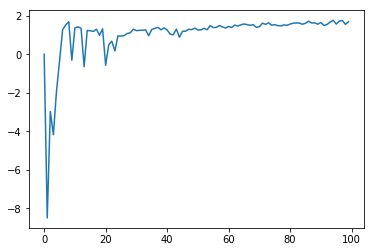

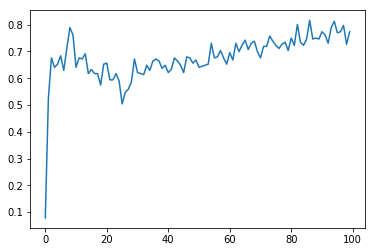

In [3]:
# path = "data/DIAYN-10-HalfCheetah-v2/DIAYN_10_HalfCheetah-v2_2021_02_26_09_25_23_0000--s-0/progress.csv"
path = "data/DIAYN-10-HalfCheetah-v2/PredEnv_Epoch100_DIAYN_10_HalfCheetah-v2_2021_02_26_09_25_23_0000--s-0/progress.csv"
df = pd.read_csv(path)
plt.plot(df["trainer/Intrinsic Rewards"]); plt.show()
plt.plot(df["trainer/DF Accuracy"]); plt.show()

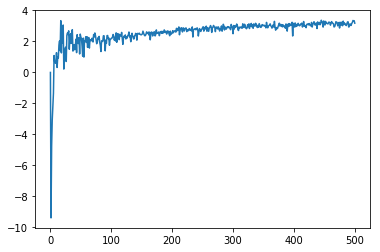

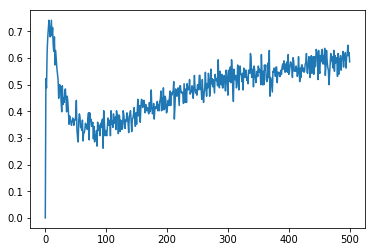

In [4]:
# path = "data/DIAYN-100-HalfCheetah-v2/DIAYN_100_HalfCheetah-v2_2021_02_26_12_55_31_0000--s-0/progress.csv"
path = "data/DIAYN-100-HalfCheetah-v2/RealEnv_Epoch500_DIAYN_100_HalfCheetah-v2_2021_02_26_12_55_31_0000--s-0/progress.csv"
df = pd.read_csv(path)
plt.plot(df["trainer/Intrinsic Rewards"][:]); plt.show()
plt.plot(df["trainer/DF Accuracy"][:]); plt.show()